# <p style="text-align: center;"> Machine Learning 101: Predicción de Precios de Alquileres en Madrid
    
   **<p style="text-align: center;"> Práctica Final**
        
   **<p style="text-align: center;"> Alberto Muñoz Freán**

In [1]:
#En primer lugar, importamos funciones que nos serán útiles a lo largo de todo el proceso.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

#Modificamos también las opciones de print para ver mejor los datos durante el análisis exploratorio.
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

**Primero, se cargan los datos del csv en un data frame, de modo que podamos trabajar con ellos:**

In [2]:
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')

**Una vez se han cargado con éxito, se procederá al train-test split (80-20) generando dos archivos csv, de modo que el preprocesamiento y análisis exploratorio no afecten a los datos de test:**

In [6]:
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

**Estos datasets tienen una gran cantidad de columnas. Es muy posible que no todas sean relevantes:**

In [31]:
#Creamos un data frame (df) con los datos del csv de train:
df = pd.read_csv('./train.csv', sep=';', decimal='.')

#Generamos una lista con el nombre de todas las columnas (variables) del data frame:
df.isna().sum()

ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                  1
Summary                             469
Space                              3106
Description                           6
Experiences Offered                   0
Neighborhood Overview              4515
Notes                              7281
Transit                            4581
Access                             5161
Interaction                        5230
House Rules                        4143
Thumbnail Url                      2295
Medium Url                         2295
Picture Url                          18
XL Picture Url                     2295
Host ID                               0
Host URL                              0
Host Name                             3
Host Since                            3
Host Location                        34
Host About                         4160


**En el caso de 'Square_Feet', el 96% de los valores son nulos, de modo que habría que rellenar la inmensa mayoría de las celdas: es mejor eliminar la columna ante la falta de datos. Lo mismo se aplicará a todas las varibales que presentan más de un 30-35% de nulos.**

**'Weekly Price' y 'Monthly Price' contienen información redundante con respecto a la variable objetivo, de modo que también serán eliminadas. Lo mismo pasa con 'Geolocation', cuya información ya está contenida en 'Latitude' y 'Longitude'**

**Todas las varibales relacionadas con 'ID', 'URL', 'Host' o 'Scraping' no contienen información relevante, al igual que 'Name', 'Summary', 'Space' y 'Description'. También se eliminarán del data frame.**

**A su vez, se filtrará el campo 'City' por "Madrid", que es la ciudad de interés para el modelo. Por esta razón, los campos 'City', 'State', 'Market' y 'Country' dejarán de ser necesarios una vez hecho el filtrado:**

In [3]:
#Filtramos por 'Madrid':
df1 = df[df['City'].str.contains("Madrid", na = False)]

#Dropeamos las columnas no necesarias:
df_train = df.drop(['Square Feet', 'Has Availability', 'License', 
                    'Jurisdiction Names', 'Weekly Price', 'Name',
                    'Monthly Price', 'ID', 'Listing Url', 'Summary',
                    'Scrape ID', 'Last Scraped', 'Thumbnail Url',
                    'Medium Url', 'Picture Url', 'XL Picture Url',
                    'Host ID', 'Host URL', 'Host Name', 'Host Since',
                    'Host Location', 'Host About','Host Response Time',
                    'Host Response Rate', 'Host Acceptance Rate',
                    'Host Thumbnail Url', 'Host Picture Url', 'Description',
                    'Host Neighbourhood', 'Host Listings Count', 'Space',
                    'Host Verifications', 'City', 'State', 'Country Code',
                    'Country', 'Calendar last Scraped', 'Neighborhood Overview',
                    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
                    'Security Deposit', 'Cleaning Fee', 'Host Total Listings Count',
                    'Market', 'Calculated host listings count', 'First Review',
                    'Last Review', 'Calendar Updated', 'Geolocation'], axis=1)

#Visualizamos los resultados para verificarlos:
df_train.head()

,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
0,none,"Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,28014,"Madrid, Spain",40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",60.0,1,0,2,1125,9,32,52,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,moderate,0.50,"Host Has Profile Pic,Is Location Exact,Require..."
1,none,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,28012,"Madrid, Spain",40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",50.0,1,0,1,1125,15,39,64,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,flexible,2.43,"Host Has Profile Pic,Host Identity Verified,Re..."
2,none,"Carabanchel, Madrid, Comunidad de Madrid 28025...",Carabanchel,Vista Alegre,Carabanchel,28025,"Madrid, Spain",40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,"Internet,Wireless Internet,Wheelchair accessib...",10.0,1,0,3,30,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN,"Host Has Profile Pic,Host Identity Verified,Is..."
3,none,"Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,28012,"Madrid, Spain",40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heat...",30.0,1,0,10,1125,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN,"Host Has Profile Pic,Requires License"
4,none,"Gaztambide, Madrid, 28 28015, Spain",Gaztambide,Gaztambide,Chamberí,28015,"Madrid, Spain",40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",32.0,1,10,1,1125,7,34,62,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,strict,2.08,"Host Has Profile Pic,Host Identity Verified,Is..."


**El siguiente paso es rellenar las celdas vacías de las columnas restantes, pues los valores nulos no son compatibles con los algoritmos de Machine Learning:**

In [4]:
df_train.isna().sum()

Experiences Offered                0
Street                             0
Neighbourhood                   4159
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed     818
Zipcode                          398
Smart Location                     0
Latitude                           0
Longitude                          0
Property Type                      0
Room Type                          0
Accommodates                       0
Bathrooms                         44
Bedrooms                          20
Beds                              37
Bed Type                           0
Amenities                        141
Price                             15
Guests Included                    0
Extra People                       0
Minimum Nights                     0
Maximum Nights                     0
Availability 30                    0
Availability 60                    0
Availability 90                    0
Availability 365                   0
Number of Reviews                  0
R

**'Price' es la variable objetivo, y al tener menos de un 1% de nulos, se dropearán las filas.**

**Todas las variables numéricas o discretas ('Bathrooms', 'Bedrooms', 'Beds' y los Scores) se completarán usando la media aritmética, a fin de rellenar la información con un valor numérico representativo.**

**Los valores nulos del resto de variables se completarán con 'Unknown', al ser variables categóricas que contienen principalmente texto:**

In [5]:
#Creamos un diccionario con los valores 'Unknown' que añadiremos en las variables categóricas:
values = {'Neighbourhood': 'Unknown', 'Neighbourhood Group Cleansed': 'Unknown', 'Zipcode': 'Unknown', 'Amenities': 'Unknown', 
          'Features': 'Unknown'}

#Los valores nulos se rellenan con los valores del diccionario:
df_train2 = df_train.fillna(value=values)

#Rellenamos las celdas de cada columna con su correspondiente media aritmética (Perdón por el pedazo código tan feo, pero no
#conseguí hacer funcionar la función que pusiste por Slack y me estaba volviendo loco ya):
df_train2['Bathrooms'].fillna((df_train2['Bathrooms'].mean()), inplace=True)
df_train2['Bedrooms'].fillna((df_train2['Bedrooms'].mean()), inplace=True)
df_train2['Beds'].fillna((df_train2['Beds'].mean()), inplace=True)
df_train2['Review Scores Rating'].fillna((df_train2['Review Scores Rating'].mean()), inplace=True)
df_train2['Review Scores Accuracy'].fillna((df_train2['Review Scores Accuracy'].mean()), inplace=True)
df_train2['Review Scores Cleanliness'].fillna((df_train2['Review Scores Cleanliness'].mean()), inplace=True)
df_train2['Review Scores Checkin'].fillna((df_train2['Review Scores Checkin'].mean()), inplace=True)
df_train2['Review Scores Communication'].fillna((df_train2['Review Scores Communication'].mean()), inplace=True)
df_train2['Review Scores Location'].fillna((df_train2['Review Scores Location'].mean()), inplace=True)
df_train2['Review Scores Value'].fillna((df_train2['Review Scores Value'].mean()), inplace=True)
df_train2['Reviews per Month'].fillna((df_train2['Reviews per Month'].mean()), inplace=True)

#Se eliminan todas las filas que aún contienen nulos (que serán únicamente los de la columna 'Price')
df_train3 = df_train2.dropna()

#Comprobamos que no quedan nulos:
df_train3.isna().sum()

Experiences Offered             0
Street                          0
Neighbourhood                   0
Neighbourhood Cleansed          0
Neighbourhood Group Cleansed    0
Zipcode                         0
Smart Location                  0
Latitude                        0
Longitude                       0
Property Type                   0
Room Type                       0
Accommodates                    0
Bathrooms                       0
Bedrooms                        0
Beds                            0
Bed Type                        0
Amenities                       0
Price                           0
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Availability 30                 0
Availability 60                 0
Availability 90                 0
Availability 365                0
Number of Reviews               0
Review Scores Rating            0
Review Scores Accuracy          0
Review Scores 

**El siguiente paso será calcular la media, la desviación estándar y los cuartiles de las columnas del data frame. Con esto, podremos saber, entre otras cosas, si existen outliers:**

In [6]:
df_train3.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,11809.0,40.485979,4.695057,-37.851182,40.409757,40.419315,40.430754,55.966912
Longitude,11809.0,-3.784060,14.020002,-123.124429,-3.707543,-3.700771,-3.683962,153.371427
Accommodates,11809.0,3.273605,2.088509,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11809.0,1.283874,0.659153,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11809.0,1.342610,0.900693,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11809.0,2.046555,1.614963,1.000000,1.000000,2.000000,2.000000,16.000000
Price,11809.0,73.712592,71.624844,9.000000,34.000000,55.000000,87.000000,969.000000
Guests Included,11809.0,1.580574,1.153438,0.000000,1.000000,1.000000,2.000000,16.000000
Extra People,11809.0,7.557710,11.160882,0.000000,0.000000,0.000000,15.000000,276.000000
Minimum Nights,11809.0,3.110255,13.435761,1.000000,1.000000,2.000000,3.000000,1125.000000


**A simple vista, 'Bathrooms' y 'Bedrooms' no deberían contener valores decimales, y 'Bathrooms' no debería ser nunca cero.**

**Para modificar esto, los registros con valores de cero se dropearán al ser pocos, y los que contengan decimales pasarán a enteros por redondeo:**

In [7]:
df_train3['Bathrooms'].value_counts()

1.000000    8846
2.000000    1829
1.500000     434
3.000000     258
2.500000      98
4.000000      62
0.500000      56
0.000000      53
5.000000      50
1.285229      43
6.000000      23
3.500000      22
4.500000      19
5.500000       7
8.000000       4
7.000000       3
6.500000       1
7.500000       1
Name: Bathrooms, dtype: int64

In [8]:
#Redondeamos los datos:
df_train3.Bathrooms = df_train3.Bathrooms.round()
df_train3.Bedrooms = df_train3.Bedrooms.round()

#Eliminamos los resultados de 0 Bathrooms:
df_train4 = df_train3[(df_train3.Bathrooms != 0)]

#Comprobamos el resultado:
df_train4.describe().T

C:\Users\amfre\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,count,mean,std,min,25%,50%,75%,max
Latitude,11700.0,40.487530,4.659978,-37.851182,40.409734,40.419253,40.430661,55.966912
Longitude,11700.0,-3.802775,14.010026,-123.124429,-3.707487,-3.700770,-3.684054,153.371427
Accommodates,11700.0,3.286496,2.090557,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11700.0,1.307179,0.663095,1.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11700.0,1.344615,0.900680,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11700.0,2.051262,1.617425,1.000000,1.000000,2.000000,2.000000,16.000000
Price,11700.0,74.071026,71.839908,10.000000,35.000000,56.000000,89.000000,969.000000
Guests Included,11700.0,1.585385,1.157401,0.000000,1.000000,1.000000,2.000000,16.000000
Extra People,11700.0,7.571197,11.169626,0.000000,0.000000,0.000000,15.000000,276.000000
Minimum Nights,11700.0,3.119487,13.494250,1.000000,1.000000,2.000000,3.000000,1125.000000


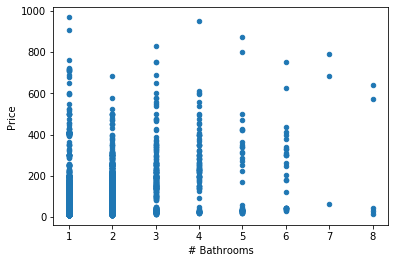

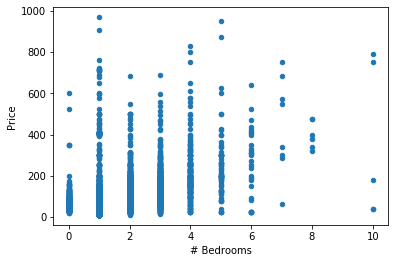

In [9]:
#Un scatter plot ayuda a comprobar si hay necesidad de un filtrado más fino:
df_train4.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price')
plt.show()

df_train4.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price')
plt.show()

**Si bien es cierto que hay alojamientos con muchos baños y/o habitaciones que parecen tener un precio muy bajo, se observa que, al aumentar cualquiera de estas dos variables, la mayoría de los puntos se van congregando en precios más altos, de modo que la tendencia de los datos es la esperada.**

**El siguiente paso es estudiar la relación entre variables. Para ello, se empezará por construir una matriz de correlación:**

In [10]:
df_train4.corr()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
Latitude,1.000000,-0.489911,0.005862,-0.002729,-0.010983,-0.000363,-0.013207,0.004733,0.018611,-0.003447,0.000019,-0.021711,-0.024223,-0.026437,-0.007363,0.018706,-0.012385,-0.011861,-0.011331,-0.006468,-0.010633,-0.016646,-0.012593,0.007018
Longitude,-0.489911,1.000000,0.018747,0.028545,0.039851,0.034778,0.005278,-0.006958,-0.051027,-0.004189,0.002396,0.011670,0.006095,0.001064,-0.007059,-0.023955,-0.016872,-0.012559,-0.003492,-0.016704,-0.021295,-0.021753,-0.016348,-0.005588
Accommodates,0.005862,0.018747,1.000000,0.414755,0.725196,0.835325,0.527757,0.564764,0.251209,0.006480,0.001164,-0.017403,-0.028937,-0.048752,0.079509,0.057040,-0.043301,-0.041261,-0.014363,-0.060194,-0.044760,0.008788,-0.049594,0.015192
Bathrooms,-0.002729,0.028545,0.414755,1.000000,0.514730,0.465723,0.364043,0.231342,0.081387,0.028969,-0.003398,0.039270,0.010102,-0.005638,0.019817,-0.076842,0.005175,0.000307,0.003752,-0.036262,-0.037410,-0.000527,-0.004849,-0.076795
Bedrooms,-0.010983,0.039851,0.725196,0.514730,1.000000,0.730143,0.493902,0.436775,0.134007,0.020749,0.000263,0.028712,0.001215,-0.023057,0.028335,-0.047024,0.011055,0.005509,0.009471,-0.022997,-0.007618,-0.028150,-0.006086,-0.069590
Beds,-0.000363,0.034778,0.835325,0.465723,0.730143,1.000000,0.438100,0.456603,0.185342,0.007279,0.001160,0.043089,0.025603,0.002235,0.090635,0.016143,-0.034799,-0.044489,-0.012005,-0.045040,-0.031409,-0.023812,-0.039284,-0.035170
Price,-0.013207,0.005278,0.527757,0.364043,0.493902,0.438100,1.000000,0.295415,0.103582,0.029353,0.000805,0.108459,0.066057,0.033792,0.058397,-0.056811,0.045200,0.043199,0.056651,-0.008558,0.003033,0.075059,0.010606,-0.071485
Guests Included,0.004733,-0.006958,0.564764,0.231342,0.436775,0.456603,0.295415,1.000000,0.359523,0.002882,-0.004578,-0.052093,-0.049390,-0.053117,0.061465,0.100165,0.013854,0.017253,0.028722,0.003385,0.009127,0.042210,0.008926,0.054841
Extra People,0.018611,-0.051027,0.251209,0.081387,0.134007,0.185342,0.103582,0.359523,1.000000,-0.020011,-0.003613,0.048685,0.058496,0.062507,0.115762,0.077633,0.024656,0.013014,0.035215,0.021885,0.018397,0.044609,0.013558,0.000810
Minimum Nights,-0.003447,-0.004189,0.006480,0.028969,0.020749,0.007279,0.029353,0.002882,-0.020011,1.000000,-0.001055,-0.012955,-0.021621,-0.022070,0.004033,-0.037939,0.004810,-0.021493,-0.031560,-0.002603,0.003752,0.006196,-0.017699,-0.051186


**Valores de la matriz en el entorno de +/- 0.8 indican una correlación muy elevada entre dos variables. Esto puede suponer una fuente de error cuando se usan ciertos algoritmos de Machine Learning. Para evitarlo, se eliminará una de esas dos variables:**

**- Las variables Availability 30, 60 y 90 se observan muy relacionadas entre sí, como cabría esperar, pues son diferentes medidas temporales de la misma información. Para evitar redundancias, conservaremos solo la variable 'Availability 30'.**

**- 'Accomodates' y 'Beds' también presentan una gran relación entre sí, también lógico pues se espera una relación entre el número de huéspedes y las camas de un alojamiento. En este caso, conservaremos 'Accomodates', pues 'Bedrooms' debería aportar prácticamente la misma información que 'Beds', a pesar de que la matriz diga que su correlación no es tan alta.**

**- 'Accommodates' (Acc) presenta cierta correlación con 'Bathrooms' (Bath) y 'Bedrooms' (Bed). Sería interesante estudiar dicha relación, por ejemplo, creando dos nuevas columnas: 'Bath/Acc' y 'Bed/Acc':**

In [11]:
#Creamos variables con los datos para rellenar las columnas:
BathAcc = df_train4['Bathrooms']/df_train4['Accommodates']
BedAcc = df_train4['Bedrooms']/df_train4['Accommodates']

#Creamos las columnas y usamos las variables para poblarlas:
df_train4['Bath/Acc'] = BathAcc
df_train4['Bed/Acc'] = BedAcc

#Movemos la columna 'Price' al final del data frame por mera comodidad:
col_name = df_train4['Price']
df_train4.pop('Price')
df_train4.insert(38, "Price", col_name)

#Eliminamos las variables ya expuestas anteriormente:
df_train5 = df_train4.drop(['Availability 60', 'Availability 90', 'Beds'], axis=1)

#Verificamos los resultados:
df_train5.head()

C:\Users\amfre\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\amfre\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Bath/Acc,Bed/Acc,Price
0,none,"Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,28014,"Madrid, Spain",40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",1,0,2,1125,9,117,12,95.000000,9.00000,10.000000,10.000000,10.000000,10.000000,9.000000,moderate,0.500000,"Host Has Profile Pic,Is Location Exact,Require...",0.25,0.25,60.0
1,none,"Madrid, Comunidad de Madrid 28012, Spain",Unknown,Sol,Centro,28012,"Madrid, Spain",40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",1,0,1,1125,15,208,20,91.000000,9.00000,9.000000,10.000000,10.000000,10.000000,10.000000,flexible,2.430000,"Host Has Profile Pic,Host Identity Verified,Re...",0.25,0.25,50.0
2,none,"Carabanchel, Madrid, Comunidad de Madrid 28025...",Carabanchel,Vista Alegre,Carabanchel,28025,"Madrid, Spain",40.389048,-3.740374,Apartment,Shared room,1,2.0,1.0,Real Bed,"Internet,Wireless Internet,Wheelchair accessib...",1,0,3,30,14,140,0,91.628179,9.41004,9.320726,9.623905,9.647863,9.534655,9.211345,moderate,1.873326,"Host Has Profile Pic,Host Identity Verified,Is...",2.00,1.00,10.0
3,none,"Madrid, Comunidad de Madrid 28012, Spain",Unknown,Embajadores,Centro,28012,"Madrid, Spain",40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heat...",1,0,10,1125,0,311,0,91.628179,9.41004,9.320726,9.623905,9.647863,9.534655,9.211345,strict,1.873326,"Host Has Profile Pic,Requires License",1.50,0.50,30.0
4,none,"Gaztambide, Madrid, 28 28015, Spain",Gaztambide,Gaztambide,Chamberí,28015,"Madrid, Spain",40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",1,10,1,1125,7,337,97,92.000000,9.00000,9.000000,9.000000,10.000000,9.000000,9.000000,strict,2.080000,"Host Has Profile Pic,Host Identity Verified,Is...",0.50,0.50,32.0


**Por último, se hará una nueva matriz de correlación para comprobar si la generación de nuevas variables provoca algún cambio significativo:**

In [12]:
df_train5.corr()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month,Bath/Acc,Bed/Acc,Price
Latitude,1.000000,-0.489911,0.005862,-0.002729,-0.010983,0.004733,0.018611,-0.003447,0.000019,-0.021711,-0.007363,0.018706,-0.012385,-0.011861,-0.011331,-0.006468,-0.010633,-0.016646,-0.012593,0.007018,-0.017430,-0.029518,-0.013207
Longitude,-0.489911,1.000000,0.018747,0.028545,0.039851,-0.006958,-0.051027,-0.004189,0.002396,0.011670,-0.007059,-0.023955,-0.016872,-0.012559,-0.003492,-0.016704,-0.021295,-0.021753,-0.016348,-0.005588,0.006321,0.016846,0.005278
Accommodates,0.005862,0.018747,1.000000,0.414755,0.725196,0.564764,0.251209,0.006480,0.001164,-0.017403,0.079509,0.057040,-0.043301,-0.041261,-0.014363,-0.060194,-0.044760,0.008788,-0.049594,0.015192,-0.502138,-0.368536,0.527757
Bathrooms,-0.002729,0.028545,0.414755,1.000000,0.514730,0.231342,0.081387,0.028969,-0.003398,0.039270,0.019817,-0.076842,0.005175,0.000307,0.003752,-0.036262,-0.037410,-0.000527,-0.004849,-0.076795,0.392449,0.116474,0.364043
Bedrooms,-0.010983,0.039851,0.725196,0.514730,1.000000,0.436775,0.134007,0.020749,0.000263,0.028712,0.028335,-0.047024,0.011055,0.005509,0.009471,-0.022997,-0.007618,-0.028150,-0.006086,-0.069590,-0.175682,0.222588,0.493902
Guests Included,0.004733,-0.006958,0.564764,0.231342,0.436775,1.000000,0.359523,0.002882,-0.004578,-0.052093,0.061465,0.100165,0.013854,0.017253,0.028722,0.003385,0.009127,0.042210,0.008926,0.054841,-0.257870,-0.170779,0.295415
Extra People,0.018611,-0.051027,0.251209,0.081387,0.134007,0.359523,1.000000,-0.020011,-0.003613,0.048685,0.115762,0.077633,0.024656,0.013014,0.035215,0.021885,0.018397,0.044609,0.013558,0.000810,-0.161139,-0.139832,0.103582
Minimum Nights,-0.003447,-0.004189,0.006480,0.028969,0.020749,0.002882,-0.020011,1.000000,-0.001055,-0.012955,0.004033,-0.037939,0.004810,-0.021493,-0.031560,-0.002603,0.003752,0.006196,-0.017699,-0.051186,0.015323,0.014765,0.029353
Maximum Nights,0.000019,0.002396,0.001164,-0.003398,0.000263,-0.004578,-0.003613,-0.001055,1.000000,0.001947,0.010919,-0.005961,0.000366,0.004503,0.006027,-0.008790,-0.010324,0.004613,-0.003650,-0.006098,-0.003672,-0.002949,0.000805
Availability 30,-0.021711,0.011670,-0.017403,0.039270,0.028712,-0.052093,0.048685,-0.012955,0.001947,1.000000,0.438891,-0.130195,-0.069316,-0.073175,-0.048677,-0.058095,-0.054969,-0.083506,-0.077037,-0.124564,0.050055,0.112436,0.108459


**No es necesario eliminar más variables por el momento. El siguiente paso es codificar las variables categóricas, de modo que solo incluyan valores numéricos y así sean aptas para su procesamiento. Para hacer esto, se usará Mean Encoder:**

In [13]:
#Creamos una lista cuyos registros coincidan con el nombre de las variables categóricas a codificar:
categorical = ['Experiences Offered', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 
               'Zipcode', 'Smart Location', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy', 
               'Features']

#Creamos un diccionario donde se irán guardando las medias:
mean_map = {}

#Este bucle irá sustituyendo los valores de las variables categóricas con las medias de la variable objetivo ('Price') 
#en función de los registros de la variable en cuestión:
for c in categorical:
    mean = df_train5.groupby(c)['Price'].mean()
    df_train5[c] = df_train5[c].map(mean)  
    mean_map[c] = mean

#Verificamos el resultado:    
df_train5.head()

,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Bath/Acc,Bed/Acc,Price
0,73.964573,126.482759,112.162791,104.600000,70.400568,83.679208,66.524538,40.407732,-3.684819,72.540875,95.131726,4,1.0,1.0,74.451241,60.000000,1,0,2,1125,9,117,12,95.000000,9.00000,10.000000,10.000000,10.000000,10.000000,9.000000,65.335326,0.500000,61.670878,0.25,0.25,60.0
1,73.964573,60.147268,75.039059,86.061198,73.108539,67.822747,66.524538,40.415802,-3.705340,72.540875,95.131726,4,1.0,1.0,74.451241,68.333333,1,0,1,1125,15,208,20,91.000000,9.00000,9.000000,10.000000,10.000000,10.000000,10.000000,64.593936,2.430000,71.843750,0.25,0.25,50.0
2,73.964573,35.358974,40.168831,37.074074,39.860140,38.073684,66.524538,40.389048,-3.740374,72.540875,31.769231,1,2.0,1.0,74.451241,10.000000,1,0,3,30,14,140,0,91.628179,9.41004,9.320726,9.623905,9.647863,9.534655,9.211345,65.335326,1.873326,82.530163,2.00,1.00,10.0
3,73.964573,60.147268,75.039059,60.921196,73.108539,67.822747,66.524538,40.412814,-3.703052,72.540875,41.006865,2,3.0,1.0,74.451241,23.750000,1,0,10,1125,0,311,0,91.628179,9.41004,9.320726,9.623905,9.647863,9.534655,9.211345,87.283333,1.873326,57.666667,1.50,0.50,30.0
4,73.964573,32.000000,57.845070,56.541284,73.000000,61.915254,66.524538,40.438631,-3.713716,72.540875,41.006865,2,1.0,1.0,74.451241,32.500000,1,10,1,1125,7,337,97,92.000000,9.00000,9.000000,9.000000,10.000000,9.000000,9.000000,87.283333,2.080000,71.722558,0.50,0.50,32.0


**Ahora que el data frame solo contiene valores numéricos, podemos empezar a probar modelos predictivos para la variable objetivo.**

**El primero será Random Forest. Una de las propiedades de los algoritmos basados en árboles, es que es posible medir la "importancia" de las variables para el modelo, con lo cual es posible hacer una selección de características aún más exhaustiva:**

In [24]:
#Convertimos los valores del data frame en un formato compatible con el modelo:
data = df_train5.values 

y_train = data[:,-1:]    # Este array contiene únicamente la variable objetivo 'Price'.
x_train = data[:,0:35]   # Este array contiene los datos del resto de variables del data frame.

best mean cross-validation score: 0.881
best parameters: {'max_depth': 18}


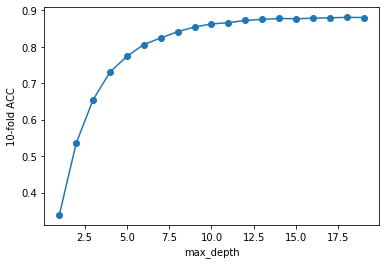

In [25]:
#Importamos las funciones necesarias:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#Ejecutamos Grid Search para obtener los parámetros óptimos del modelo (Profundidad del árbol):
maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(x_train, y_train.ravel())

#Imprimimos los resultados obtenidos:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#Representamos la gráfica:
scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [27]:
#Calculamos el score del modelo según la pronfundidad establecida:
maxDepthOptimo = 12
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(x_train,y_train.ravel())

print("Train: ",bagModel.score(x_train,y_train))

Train:  0.9589110126600372


**La profundidad óptima según grid search (18) nos da un score de 0.98, pero viendo la gráfica, se puede optar por 12, pues tiene casi la misma Accuracy y puede que generalice mejor. Al probarlo, el score es de 0.95, un score bastante alto teniendo en cuenta que el dataset tiene más de 10.000 registros.**

**Lo siguiente es observar la importancia de las variables por si es posible dropear alguna, y con ello reducir la complejidad del modelo y mejorar su interpretabilidad. Haciendo esto, se observa que bastantes variables tienen poca o nula importancia en la predicción: 'Experiences Offered', 'Bed Type', 'Review Scores Value', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Location', 'Maximum Nights', 'Cancellation Policy', 'Review Scores Rating' y 'Property Type' (ver gráfico debajo).**

**Al eliminar esas variables el resultado cambia ligeramente, pero la profundidad óptima sigue siendo 18, aunque en este caso, se puede disminuir hasta 11. El nuevo score para profundidad 11 es 0.94. No parece que eliminar tantas características haya tenido gran impacto en el modelo, de hecho, es posible que el modelo haya empeorado ligeramente. Por esta razón, nos quedamos con los valores originales y mantenemos todas las variables:**

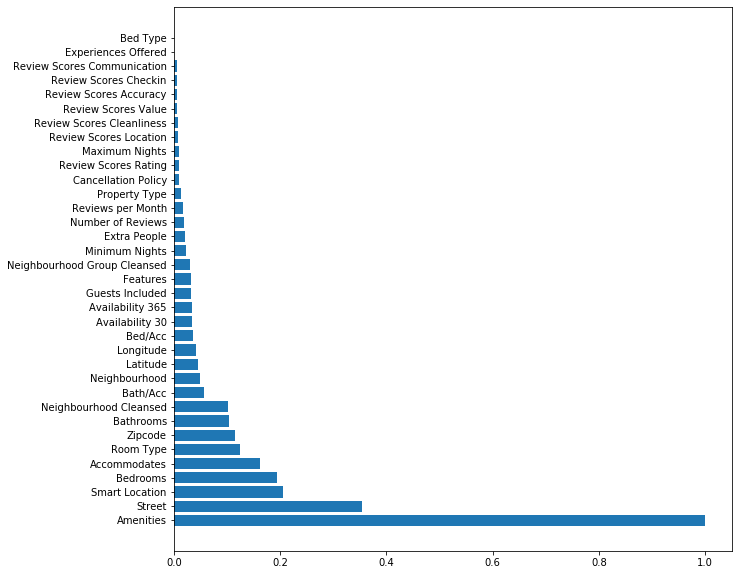

In [33]:
#Eliminamos la variable objetivo:
features = df_train5.columns.drop(['Price'])

#Determinamos los scores de importancia y los normalizamos:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

#Los ordenamos de forma creciente:
indices = np.argsort(importances)[::-1]

#Representamos los resultados en una gráfica:
plt.figure(figsize=(10,10))
plt.barh(range(x_train.shape[1]),importances[indices])
plt.yticks(range(x_train.shape[1]),features[indices])
plt.show()

**El siguiente método a probar será LASSO, que persigue prevenir el overfitting y mejorar la interpretabilidad:**

best mean cross-validation score: -580.368
best parameters: {'alpha': 10.0}


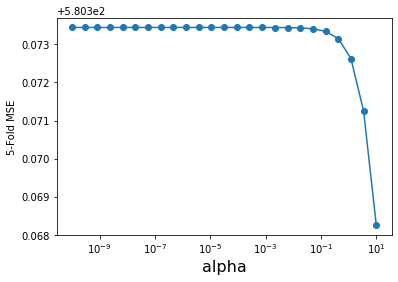

In [29]:
#Importamos las funciones relevantes:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#Ejecutamos GridSearch para obtener los parámetros óptimos (alpha):
alpha_vector = np.logspace(-10,1,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5)
grid.fit(x_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#Representamos los resultados:
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

**Como último modelo, probaremos con un Boosted Tree:**

In [32]:
#Importamos las funciones relevantes:
from sklearn.ensemble import GradientBoostingRegressor

#Determinamos los intervalos para iteraciones y Learning Rate:
Niterations = [1500, 2000, 2500]
learningRate = [0.1, 0.05]

#Ejecutamos GridSearch para obtener los parámetros óptimos del modelo (Learning Rate y Número de Estimadores)
param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(x_train, y_train.ravel())

#Imprimimos los resultados:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.915
best parameters: {'learning_rate': 0.05, 'n_estimators': 1500}


**Ahora que tenemos los parámetros óptimos de los tres modelos propuestos, podemos empezar a trabajar con los datos de test.**

**Lo primero es realizar exactamente el mismo preprocesado que han sufrido los datos de train:**

In [35]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

df_test1 = df_test[df_test['City'].str.contains("Madrid", na = False)]

df_test1 = df_test.drop(['Square Feet', 'Has Availability', 'License', 
                    'Jurisdiction Names', 'Weekly Price', 'Name',
                    'Monthly Price', 'ID', 'Listing Url', 'Summary',
                    'Scrape ID', 'Last Scraped', 'Thumbnail Url',
                    'Medium Url', 'Picture Url', 'XL Picture Url',
                    'Host ID', 'Host URL', 'Host Name', 'Host Since',
                    'Host Location', 'Host About','Host Response Time',
                    'Host Response Rate', 'Host Acceptance Rate',
                    'Host Thumbnail Url', 'Host Picture Url', 'Description',
                    'Host Neighbourhood', 'Host Listings Count', 'Space',
                    'Host Verifications', 'City', 'State', 'Country Code',
                    'Country', 'Calendar last Scraped', 'Neighborhood Overview',
                    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
                    'Security Deposit', 'Cleaning Fee', 'Host Total Listings Count',
                    'Market', 'Calculated host listings count', 'First Review',
                    'Last Review', 'Calendar Updated', 'Geolocation'], axis=1)

values2 = {'Neighbourhood': 'Unknown', 'Neighbourhood Group Cleansed': 'Unknown', 'Zipcode': 'Unknown', 'Amenities': 'Unknown', 
          'Features': 'Unknown'}

df_test2 = df_test1.fillna(value=values2)

df_test2['Bathrooms'].fillna((df_test2['Bathrooms'].mean()), inplace=True)
df_test2['Bedrooms'].fillna((df_test2['Bedrooms'].mean()), inplace=True)
df_test2['Beds'].fillna((df_test2['Beds'].mean()), inplace=True)
df_test2['Review Scores Rating'].fillna((df_test2['Review Scores Rating'].mean()), inplace=True)
df_test2['Review Scores Accuracy'].fillna((df_test2['Review Scores Accuracy'].mean()), inplace=True)
df_test2['Review Scores Cleanliness'].fillna((df_test2['Review Scores Cleanliness'].mean()), inplace=True)
df_test2['Review Scores Checkin'].fillna((df_test2['Review Scores Checkin'].mean()), inplace=True)
df_test2['Review Scores Communication'].fillna((df_test2['Review Scores Communication'].mean()), inplace=True)
df_test2['Review Scores Location'].fillna((df_test2['Review Scores Location'].mean()), inplace=True)
df_test2['Review Scores Value'].fillna((df_test2['Review Scores Value'].mean()), inplace=True)
df_test2['Reviews per Month'].fillna((df_test2['Reviews per Month'].mean()), inplace=True)

df_test3 = df_test2.dropna()

df_test3.isna().sum()

Experiences Offered             0
Street                          0
Neighbourhood                   0
Neighbourhood Cleansed          0
Neighbourhood Group Cleansed    0
Zipcode                         0
Smart Location                  0
Latitude                        0
Longitude                       0
Property Type                   0
Room Type                       0
Accommodates                    0
Bathrooms                       0
Bedrooms                        0
Beds                            0
Bed Type                        0
Amenities                       0
Price                           0
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Availability 30                 0
Availability 60                 0
Availability 90                 0
Availability 365                0
Number of Reviews               0
Review Scores Rating            0
Review Scores Accuracy          0
Review Scores 

In [38]:
df_test3.Bathrooms = df_test3.Bathrooms.round()
df_test3.Bedrooms = df_test3.Bedrooms.round()

df_test4 = df_test3[(df_test3.Bathrooms != 0)]

BathAcc = df_test4['Bathrooms']/df_test4['Accommodates']
BedAcc = df_test4['Bedrooms']/df_test4['Accommodates']

df_test4['Bath/Acc'] = BathAcc
df_test4['Bed/Acc'] = BedAcc

col_name = df_test4['Price']
df_test4.pop('Price')
df_test4.insert(38, "Price", col_name)

df_test5 = df_test4.drop(['Availability 60', 'Availability 90', 'Beds'], axis=1)

categorical2 = ['Experiences Offered', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 
               'Zipcode', 'Smart Location', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy', 
               'Features']

mean_map = {}

for c in categorical2:
    mean = df_test5.groupby(c)['Price'].mean()
    df_test5[c] = df_test5[c].map(mean)  
    mean_map[c] = mean

#Verificamos el resultado:    
df_test5.head()

C:\Users\amfre\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\amfre\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\amfre\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features,Bath/Acc,Bed/Acc,Price
0,73.322845,33.777778,37.583333,26.166667,30.523810,29.058824,64.971977,40.346320,-3.691440,71.406463,39.272066,1,1.0,1.0,73.895178,15.0,1,0,1,1125,7,46,11,100.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.00000,64.866815,1.590000,87.980769,1.000000,1.0,15.0
1,73.322845,89.000000,85.100000,81.485000,72.542537,85.645631,64.971977,40.414423,-3.712847,71.406463,39.272066,1,1.0,1.0,49.929825,25.0,1,0,3,1125,0,310,17,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,65.223121,1.200000,65.955645,1.000000,1.0,25.0
2,73.322845,61.888889,76.093484,91.171429,71.119171,71.447368,64.971977,40.437012,-3.698987,71.406463,95.493266,2,1.0,1.0,73.895178,45.0,1,25,1,1125,6,120,0,91.974492,9.439637,9.361159,9.613351,9.643753,9.522323,9.24534,85.167832,1.856832,60.430464,0.500000,0.5,45.0
3,73.322845,37.400000,76.093484,38.142857,35.350000,38.880000,64.971977,40.407932,-3.744533,71.406463,39.272066,1,1.0,1.0,73.895178,25.0,1,0,1,1125,28,363,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,65.223121,0.240000,60.430464,1.000000,1.0,25.0
4,73.322845,59.157407,76.093484,58.939726,72.542537,65.102500,64.971977,40.410107,-3.704869,71.406463,95.493266,3,1.0,0.0,73.895178,40.0,1,0,1,1125,0,0,0,91.974492,9.439637,9.361159,9.613351,9.643753,9.522323,9.24534,64.866815,1.856832,56.047782,0.333333,0.0,40.0


**Ahora que el data frame de test ha sido preprocesado, comenzaremos por aplicar el modelo de Random Forest:**

In [43]:
data = df_test5.values 

y_test = data[:,-1:]   
x_test = data[:,0:35]   

In [45]:
maxDepthOptimo = 12 #Parámetro óptimo según GridSearch
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(x_train,y_train)

print("Train: ",bagModel.score(x_train,y_train))
print("Test: ",bagModel.score(x_test,y_test))

C:\Users\amfre\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train:  0.9566536003366285
Test:  0.9126455033036793


In [65]:
from sklearn.metrics import mean_squared_error
MSE_RF = mean_squared_error(y_test, bagModel.predict(x_test))
print("MSE de Random Forest: ", round(MSE_RF,2))

MSE de Random Forest:  478.43


**A continuación, probaremos con LASSO:**

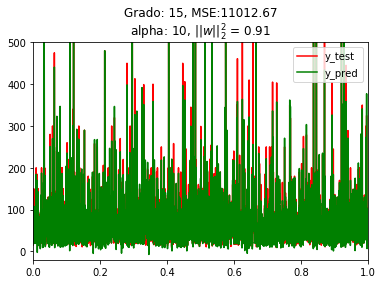

w1:  0.0
w2:  0.3516969365541137
w3:  -0.05496181205979861
w4:  -0.06742720928630608
w5:  -0.004241924663845837
w6:  -0.15486895120353442
w7:  0.14014787396300216
w8:  0.0
w9:  -0.0
w10:  -0.021654266842084546
w11:  0.10102635124077125
w12:  0.0
w13:  0.0
w14:  0.0
w15:  0.0
MSE de LASSO:  11012.67


In [140]:
from sklearn.linear_model import Lasso

N_test  = len(y_test)
x = np.linspace(0,1,N_test)
degree = 15

a = 10 #Parámetro óptimo según GridSearch
lasso = Lasso(alpha=a).fit(x_train,y_train)
w = lasso.coef_
norm_w2 = np.dot(w,w.T)
    
y_hat = lasso.predict(x_test)

error_test = np.mean(np.power(y_test - y_hat,2)) 

plt.plot(x,y_test,'r',label='y_test')
plt.plot(x,y_hat,'g',label='y_pred')
plt.title('Grado: %i, MSE:%.2f\nalpha: %g, $||w||_2^2$ = %.2g'%(degree,error_test,a,norm_w2))
plt.legend()
plt.xlim((0, 1))
plt.ylim((-20, 500))
plt.show()

coef_names = ['w' + str(i) + ': ' for i in range(1,degree+1)]

for f,wi in zip(coef_names,w):
    print(f,wi)
    
print("MSE de LASSO: ", round(error_test,2))

**Por último, Boosted Tree:**

C:\Users\amfre\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


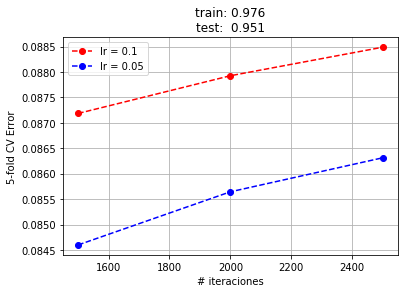

In [57]:
lrOptimo = 0.05 #Parámetro óptimo según GridSearch.
neOptimo = 1500 #Parámetro óptimo según GridSearch.
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(x_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(x_train,y_train),bt.score(x_test,y_test)))
plt.grid()
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
MSE_BT = mean_squared_error(y_test, bt.predict(x_test))
print("MSE de Boosted Tree: ", round(MSE_BT,2))

MSE de Boosted Tree:  268.04


**Resumen de los resultados (MSE):**

- Random Forest: **478.43** 

- LASSO: **11012.67**

- Boosted Tree: **268.04**

**Aquel modelo con menor Error Cuadrático Medio (MSE) será el más adecuado, pues es el que menos se equivoca en comparación con los datos reales.**

**Siguiendo este criterio, LASSO es el modelo menos preciso, seguido de Random Forest.**

**Por tanto, Boosted Tree es el modelo más adecuado de los tres para predecir precios de alojamientos/habitaciones, de acuerdo con los datos de training utilizados y su preprocesado.**